## Laboratorium 6


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab[xx].ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```


### Zadanie 1

* Wybierz 10 pierwszych gatunków liści (będziesz je używać w kolejnych zadaniach), o identyfikatorach: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.
* Znormalizuj dane w zakresie 0-1.
* Wybierz 2 najlepsze cechy.


In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

features = list(range(2, 16))
classes = list(range(1, 11))

mask = np.isin(train[:,0], classes)

X_train = train[mask]
X_train = X_train[:, features]

Y_train = train[mask]
Y_train = Y_train[:, 0]

mask = np.isin(test[:,0], classes)
X_test = test[mask]
X_test = X_test[:, features]

Y_test = test[mask]
Y_test = Y_test[:, 0]

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

selector = SelectKBest(score_func=f_classif, k=2)
X_train_best = selector.fit_transform(X_train_scaled, Y_train)
X_test_best = selector.transform(X_test_scaled)

best_features = selector.get_support(indices=True)

X_train_best = X_train_scaled[:, best_features]
X_test_best = X_test_scaled[:, best_features]


### Zadanie 2

(kontynuacja zadania 1)

* Przeprowadź klasteryzację zbioru za pomocą metody [$k$-średnich](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
* Korzystając z metody łokcia, wybierz liczbę klastrów ($c$).
* Podziel zbiór na $c$ klastrów.
* Wyświetl wyniki klasteryzacji dla $c$ klastrów w postaci wykresu.

> Dla chętnych: zaimplementować samodzielnie metodę k-średnich i wyświetlić kolejne kroki klasteryzacji.




d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

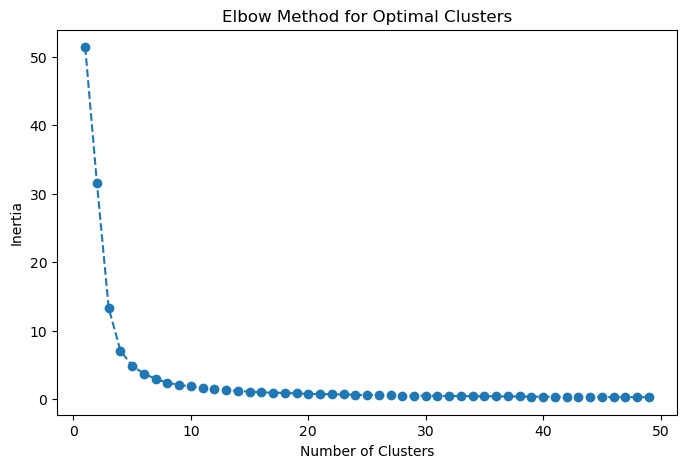

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


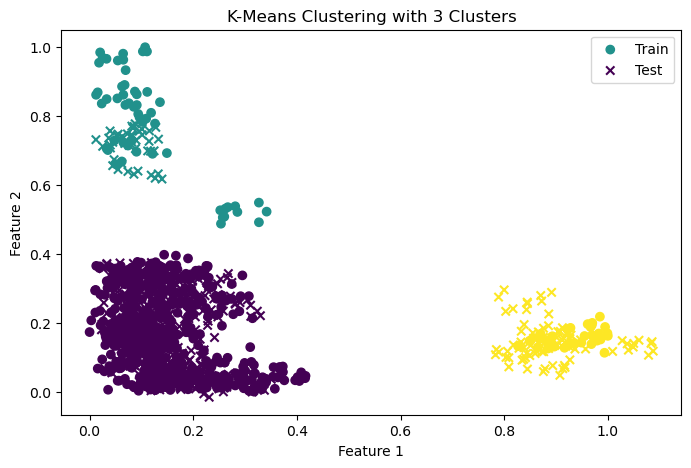

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
cluster_range = range(1, 50)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_best)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_train_best)

train_clusters = kmeans.predict(X_train_best)
test_clusters = kmeans.predict(X_test_best)

plt.figure(figsize=(8, 5))
plt.scatter(X_train_best[:, 0], X_train_best[:, 1], c=train_clusters, cmap='viridis', marker='o', label='Train')
plt.scatter(X_test_best[:, 0], X_test_best[:, 1], c=test_clusters, cmap='viridis', marker='x', label='Test')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
